In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [49]:
advertise=pd.read_csv("Advertising.csv")

In [50]:
advertise=advertise[["TV","radio","newspaper","sales"]]

In [51]:
advertise.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(advertise[["TV","newspaper"]],advertise.sales,test_size = 0.3,
random_state = 0)

In [87]:
len(x_train)

140

In [88]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
lr.intercept_

6.212767213588123

In [90]:
y_pred=lr.predict(x_test)

In [91]:
test_pred_df=pd.DataFrame({'actual':y_test,
                            'predict':np.round(y_pred,2),
                            'residuals':y_test-y_pred})

In [92]:
test_pred_df[0:20]

,actual,predict,residuals
18,11.3,10.10,1.196138
170,8.4,9.26,-0.855581
107,8.7,11.26,-2.564372
98,25.4,21.37,4.032869
177,11.7,15.34,-3.644772
182,8.7,10.04,-1.335831
5,7.2,9.95,-2.750164
146,13.2,17.27,-4.065296
12,9.2,10.21,-1.014229
152,16.6,15.62,0.976561


In [93]:
from sklearn import metrics

In [94]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [95]:
round (rmse,2)

2.55

In [96]:
metrics.r2_score(y_test,y_pred)

0.7625312808234886

In [98]:
residuals=y_test-y_pred

/Users/rmdec/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


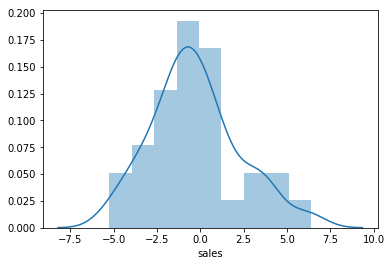

In [99]:
sns.distplot(residuals)